**Importing libraries**

In [5]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torchvision import datasets, transforms


CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD  = (0.2470, 0.2435, 0.2616)

train_tfms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
])

test_tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
])


train_data = datasets.CIFAR10(root= 'data' ,train = True ,download= True , transform = train_tfms)
test_data  = datasets.CIFAR10(root= 'data' ,train = False ,download= True , transform = test_tfms)



In [6]:
#Dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_data,  batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=2, pin_memory=True)


imgs, labels = next(iter(train_loader))
print('Train batch:', imgs.shape, labels.shape)  # expect [B, 3, 32, 32], [B]
print('dtype/device:', imgs.dtype, imgs.device)
print('label range:', labels.min().item(), 'to', labels.max().item())  # expect 0..9
print('pixel stats (after norm):', imgs.mean().item(), imgs.std().item())

classes = train_data.classes
print('Classes:', classes)

/Users/admin/Documents/GitHub/ML-journey/week-03_cnns-cifar10/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Train batch: torch.Size([128, 3, 32, 32]) torch.Size([128])
dtype/device: torch.float32 cpu
label range: 0 to 9
pixel stats (after norm): -0.3080257475376129 1.1200153827667236
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


/Users/admin/Documents/GitHub/ML-journey/week-03_cnns-cifar10/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


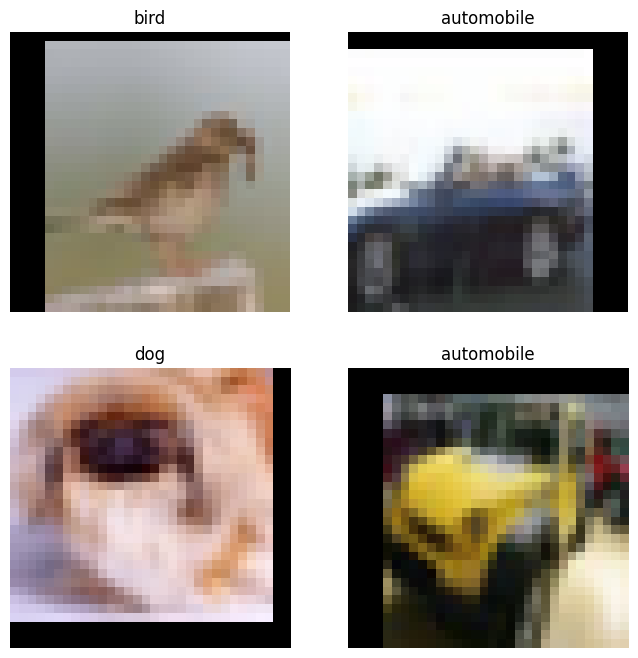

In [7]:
#Visualizing some of our CIFAR-10 DATA we're working with

import matplotlib.pyplot as plt
import numpy as np

# Helper to unnormalize and show an image
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # C,H,W → H,W,C
    img = CIFAR10_STD * img + CIFAR10_MEAN  # unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

# Get a batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show the first 4 images
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    imshow(images[i])
    plt.title(classes[labels[i]])
plt.show()